# Modulo I: Série Temporal

## Video I:
Aquisição de dados pelo site DataSus e leitura

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('../Dados/DadosTuberculoseSus.csv', encoding="ISO-8859-1", skiprows=3, sep=";", 
                    skipfooter=16, thousands=".", decimal=",", engine = 'python')
dados.head()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
0,2001,8088,6542,8095,7305,7656,6805,6987,8065,6697,7524,6874,6627,87265
1,2002,8013,7346,7961,8771,7784,6713,7746,8330,7654,8200,7532,6809,92859
2,2003,8115,7985,7474,7975,8024,7082,7949,7585,8136,8521,7624,7303,93773
3,2004,7574,6743,8574,8089,7763,7314,7825,8232,7901,8016,7753,7196,92980
4,2005,7432,6748,8441,7958,8019,7781,7282,8391,7690,7186,7587,7541,92056


### Desafio I:
Transformar os dados em uma série temporal Ano-mes

In [3]:
# Dropando a coluna total
dados.pop('Total')
# Dropando a linha Total
# Axis 0 = Linha, 1 = Coluna
dados.drop(index = 19, inplace = True)

In [4]:
dados.head()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
0,2001,8088,6542,8095,7305,7656,6805,6987,8065,6697,7524,6874,6627
1,2002,8013,7346,7961,8771,7784,6713,7746,8330,7654,8200,7532,6809
2,2003,8115,7985,7474,7975,8024,7082,7949,7585,8136,8521,7624,7303
3,2004,7574,6743,8574,8089,7763,7314,7825,8232,7901,8016,7753,7196
4,2005,7432,6748,8441,7958,8019,7781,7282,8391,7690,7186,7587,7541


In [5]:
df_st = dados.melt(id_vars = 'Ano Diagnóstico', value_name = 'Casos', var_name = 'Mes').copy()

In [6]:
df_st

,Ano Diagnóstico,Mes,Casos
0,2001,Jan,8088
1,2002,Jan,8013
2,2003,Jan,8115
3,2004,Jan,7574
4,2005,Jan,7432
...,...,...,...
223,2015,Dez,6844
224,2016,Dez,6672
225,2017,Dez,7020
226,2018,Dez,6900


In [7]:
# Resolvida a questão das colunas 
df_st['Data'] = df_st['Ano Diagnóstico'] + '-' + df_st['Mes']
df_st

,Ano Diagnóstico,Mes,Casos,Data
0,2001,Jan,8088,2001-Jan
1,2002,Jan,8013,2002-Jan
2,2003,Jan,8115,2003-Jan
3,2004,Jan,7574,2004-Jan
4,2005,Jan,7432,2005-Jan
...,...,...,...,...
223,2015,Dez,6844,2015-Dez
224,2016,Dez,6672,2016-Dez
225,2017,Dez,7020,2017-Dez
226,2018,Dez,6900,2018-Dez


# Modulo II: Manipulação de Datas

## Video I:
Preparações iniciais para utilização de nossa série temporal,<br>
Conversão de strings, transformação de datetime e plot da série temporal.

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
sns.set_palette('Accent')

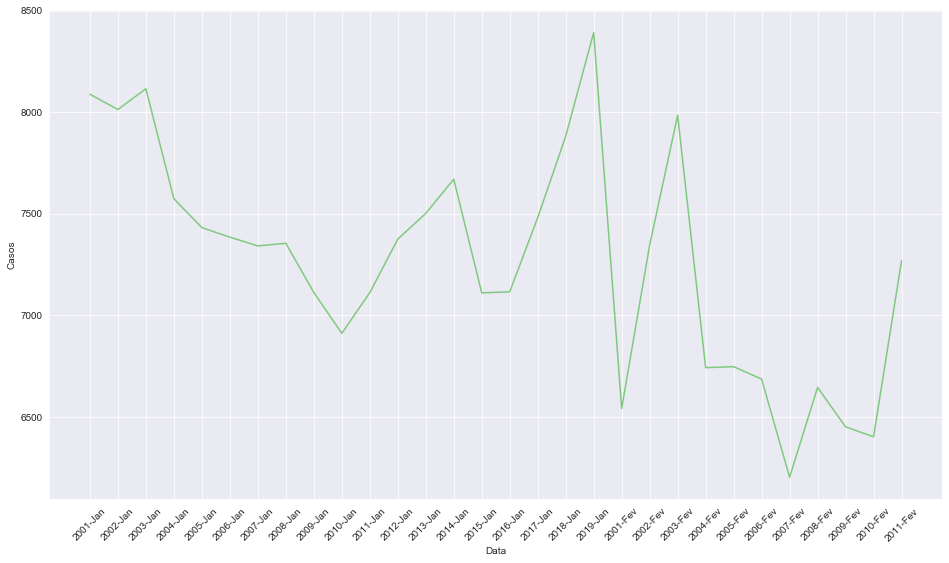

In [9]:
ax = plt.figure(figsize=(16,9))
sns.lineplot(data = df_st[:30], x = 'Data', y = 'Casos')
plt.xticks(rotation = 45)
plt.show()

In [10]:
df_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Ano Diagnóstico  228 non-null    object
 1   Mes              228 non-null    object
 2   Casos            228 non-null    int64 
 3   Data             228 non-null    object
dtypes: int64(1), object(3)
memory usage: 7.2+ KB


### Desafio II:
Converter coluna data em datetime

In [11]:
df_st['Data']

0      2001-Jan
1      2002-Jan
2      2003-Jan
3      2004-Jan
4      2005-Jan
         ...   
223    2015-Dez
224    2016-Dez
225    2017-Dez
226    2018-Dez
227    2019-Dez
Name: Data, Length: 228, dtype: object

In [12]:
# Criar dicionario para substituicao
mes_ing = {
    'Jan':'Jan',
    'Fev':'Feb',
    'Mar':'Mar',
    'Abr':'Apr',
    'Mai':'May',
    'Jun':'Jun',
    'Jul':'Jul',
    'Ago':'Aug',
    'Set':'Sep',
    'Out':'Oct',
    'Nov':'Nov',
    'Dez':'Dec'
}

In [13]:
# Atualizacao para os meses em ingles
df_st['Mes'] = df_st['Mes'].map(mes_ing)

In [14]:
df_st['Data'] = df_st['Ano Diagnóstico'] + '-' + df_st['Mes']
df_st

,Ano Diagnóstico,Mes,Casos,Data
0,2001,Jan,8088,2001-Jan
1,2002,Jan,8013,2002-Jan
2,2003,Jan,8115,2003-Jan
3,2004,Jan,7574,2004-Jan
4,2005,Jan,7432,2005-Jan
...,...,...,...,...
223,2015,Dec,6844,2015-Dec
224,2016,Dec,6672,2016-Dec
225,2017,Dec,7020,2017-Dec
226,2018,Dec,6900,2018-Dec


In [15]:
# Conversao para datetime
df_st['Data'] = pd.to_datetime(df_st['Data'])
df_st

,Ano Diagnóstico,Mes,Casos,Data
0,2001,Jan,8088,2001-01-01
1,2002,Jan,8013,2002-01-01
2,2003,Jan,8115,2003-01-01
3,2004,Jan,7574,2004-01-01
4,2005,Jan,7432,2005-01-01
...,...,...,...,...
223,2015,Dec,6844,2015-12-01
224,2016,Dec,6672,2016-12-01
225,2017,Dec,7020,2017-12-01
226,2018,Dec,6900,2018-12-01


In [16]:
# selecao apenas das colunas desejadas
df_st = df_st[['Data','Casos']]
df_st

,Data,Casos
0,2001-01-01,8088
1,2002-01-01,8013
2,2003-01-01,8115
3,2004-01-01,7574
4,2005-01-01,7432
...,...,...
223,2015-12-01,6844
224,2016-12-01,6672
225,2017-12-01,7020
226,2018-12-01,6900


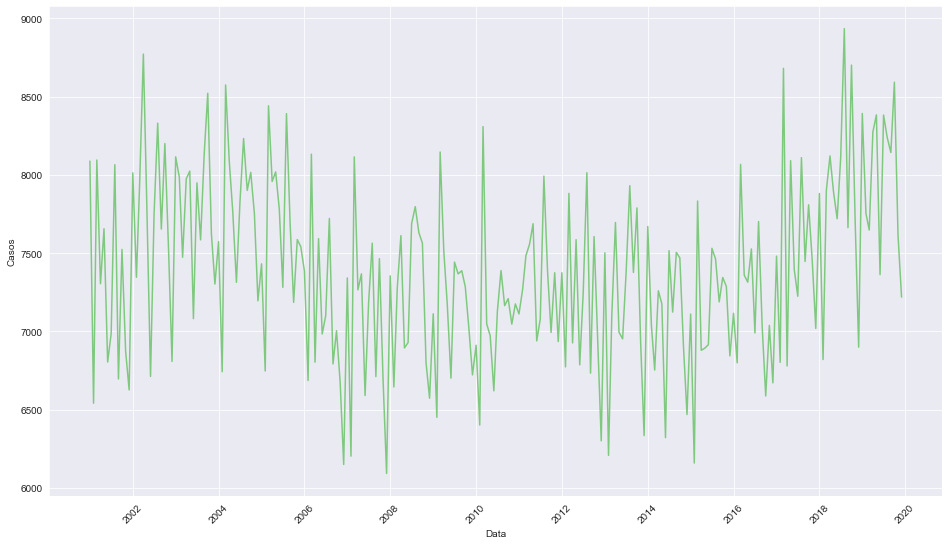

In [17]:
ax = plt.figure(figsize=(16,9))
sns.lineplot(data = df_st, x = 'Data', y = 'Casos')
plt.xticks(rotation = 45)
plt.show()

### Desafio III:
Reproduzir passo a passo com outra base de dados datasus

In [18]:
dados2 = pd.read_csv('../Dados/DadosHanseniase.csv', encoding="ISO-8859-1", skiprows=3, sep=";", 
                    skipfooter=11, thousands=".", decimal=",", engine = 'python')
dados2.head()

,Ano Notificação,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
0,2001,3703,4002,4727,4191,4703,3918,4151,4852,4148,4727,4220,3330,50672
1,2002,3687,3821,4443,5067,4915,4316,5012,5205,4932,5256,4678,3780,55112
2,2003,3876,5725,5442,5105,5121,4476,4764,4905,5254,5332,4825,4062,58887
3,2004,3941,4215,5484,4630,5540,5159,5018,5723,4875,4231,4614,4110,57540
4,2005,3921,4148,4926,4747,4742,4770,4214,5550,5002,5272,4982,4477,56751


In [19]:
# Etapas
# 1: Dropar Total
# 2: Melt
# 3: Conversao do mes
# 4: Adicao coluna data
# 5: Conversao para datetime
# 6: Plotar gráfico da série temporal


# Etapa 1
dados2.drop('Total', 1, inplace = True)
dados2.drop(index = 20, inplace = True)
dados2.head()

,Ano Notificação,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
0,2001,3703,4002,4727,4191,4703,3918,4151,4852,4148,4727,4220,3330
1,2002,3687,3821,4443,5067,4915,4316,5012,5205,4932,5256,4678,3780
2,2003,3876,5725,5442,5105,5121,4476,4764,4905,5254,5332,4825,4062
3,2004,3941,4215,5484,4630,5540,5159,5018,5723,4875,4231,4614,4110
4,2005,3921,4148,4926,4747,4742,4770,4214,5550,5002,5272,4982,4477


In [20]:
# Etapa 2
df_st2 = dados2.melt(id_vars = 'Ano Notificação', value_name = 'Casos', var_name = 'Mes').copy()
df_st2

,Ano Notificação,Mes,Casos
0,2001,Jan,3703
1,2002,Jan,3687
2,2003,Jan,3876
3,2004,Jan,3941
4,2005,Jan,3921
...,...,...,...
235,2016,Dez,2236
236,2017,Dez,2509
237,2018,Dez,2329
238,2019,Dez,2513


In [21]:
# Etapa 3: (irei usar a variável já criada)
df_st2['Mes'] = df_st2['Mes'].map(mes_ing)

In [22]:
# Etapa 4
df_st2['Data'] = df_st2['Ano Notificação'] + '-' + df_st2['Mes']

In [23]:
# Etapa 5
df_st2['Data'] = pd.to_datetime(df_st2['Data'])

In [24]:
# selecao das colunas que queremos
df_st2 = df_st2[['Data','Casos']]

## Desafio IV:
Deixar o gráfico agradável (irei realizar junto com o desafio anterior)

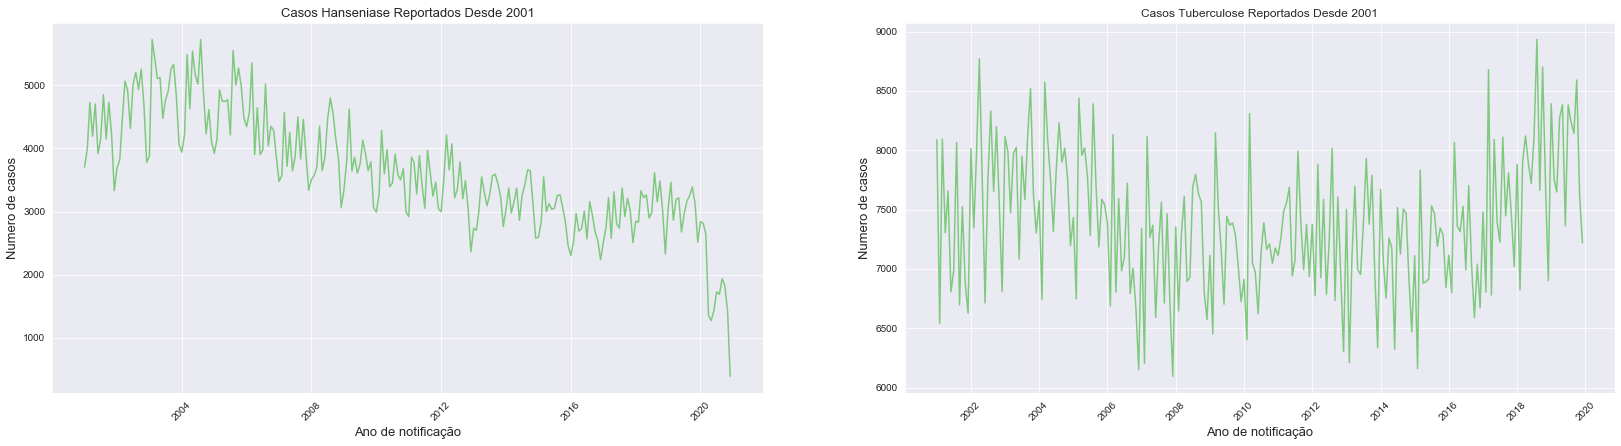

In [25]:
# Etapa 6 (irei plotar ambos os graficos lado a lado)

ax = plt.figure(1, figsize=(28, 15))

ax = plt.subplot(221)
ax = sns.lineplot(data = df_st2, x = 'Data', y = 'Casos')
plt.xticks(rotation=45)
ax.set_title('Casos Hanseniase Reportados Desde 2001', fontsize = 13)
ax.set_ylabel('Numero de casos', fontsize = 13)
ax.set_xlabel('Ano de notificação', fontsize = 13)

ax2 = plt.subplot(222)
ax2 = sns.lineplot(data = df_st, x = 'Data', y = 'Casos')
plt.xticks(rotation = 45)
ax2.set_title('Casos Tuberculose Reportados Desde 2001')
ax2.set_ylabel('Numero de casos', fontsize = 13)
ax2.set_xlabel('Ano de notificação', fontsize = 13)
plt.show()

# Modulo III: Iniciando Análise da Série Temporal:

## Video I:
Utilizaçao da Média Movel para melhor entendimento da tendencia da série temporal,<br>
Correcao de problemas nas datas

### Desafio Extra:
Pesquisar sobre espectro de frequencia

In [26]:
# Nossa base de dados esta desordenada, antes de realizar o calculo da média movel iremos ordena-la
# tambem iremos resetar o index

df_st.sort_values(by = ["Data"], inplace = True)
df_st.reset_index(drop = True, inplace = True)

C:\Users\Kaiqu\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [27]:
df_st['Media Movel 3'] = df_st['Casos'].rolling(3).mean()

C:\Users\Kaiqu\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


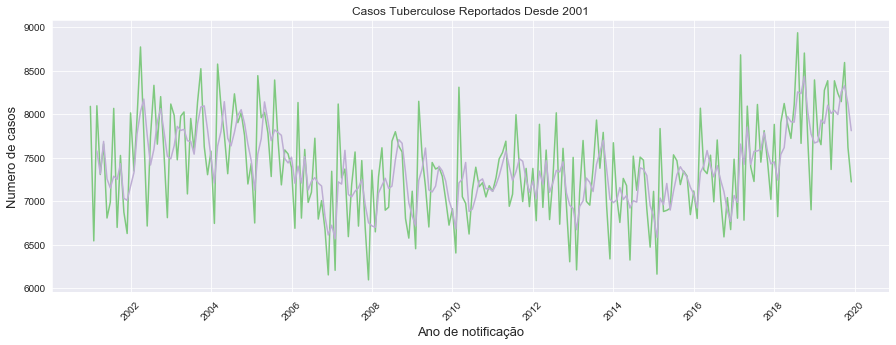

In [28]:
ax = plt.figure(figsize=(15,5))

ax = sns.lineplot(data = df_st, x = 'Data', y = 'Casos')
ax = sns.lineplot(data = df_st, x = 'Data', y = 'Media Movel 3')
plt.xticks(rotation = 45)
ax.set_title('Casos Tuberculose Reportados Desde 2001')
ax.set_ylabel('Numero de casos', fontsize = 13)
ax.set_xlabel('Ano de notificação', fontsize = 13)
plt.show()

In [29]:
# Dados muito caoticos ainda assim, aumentar a janela do rolling

df_st['Media Movel 6'] = df_st['Casos'].rolling(6).mean()

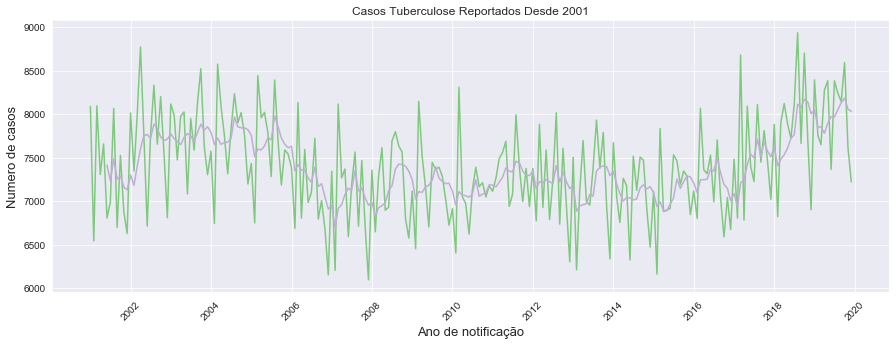

In [30]:
ax = plt.figure(figsize=(15,5))
ax = sns.lineplot(data = df_st, x = 'Data', y = 'Casos',palette = 'rocket')
ax = sns.lineplot(data = df_st, x = 'Data', y = 'Media Movel 6' )
plt.xticks(rotation = 45)
ax.set_title('Casos Tuberculose Reportados Desde 2001')
ax.set_ylabel('Numero de casos', fontsize = 13)
ax.set_xlabel('Ano de notificação', fontsize = 13)
plt.show()

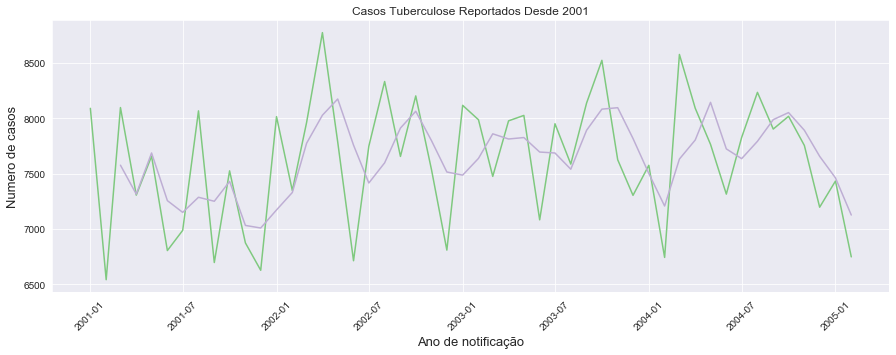

In [31]:
# no grafico abaixo, nossa media movel esta atrasada, entao iremos realizar o calculo da media movel centrada
df_st['Media Movel 3C'] = df_st['Casos'].rolling(3, center = True).mean()

ax = plt.figure(figsize=(15,5))
ax = sns.lineplot(data = df_st[:50], x = 'Data', y = 'Casos',palette = 'rocket')
ax = sns.lineplot(data = df_st[:50], x = 'Data', y = 'Media Movel 3' )
plt.xticks(rotation = 45)
ax.set_title('Casos Tuberculose Reportados Desde 2001')
ax.set_ylabel('Numero de casos', fontsize = 13)
ax.set_xlabel('Ano de notificação', fontsize = 13)
plt.show()

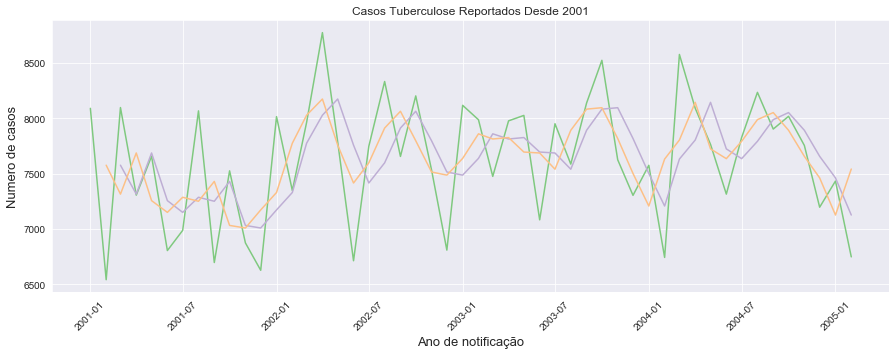

In [32]:
# novo grafico com a media centrada

ax = plt.figure(figsize=(15,5))
ax = sns.lineplot(data = df_st[:50], x = 'Data', y = 'Casos',palette = 'rocket')
ax = sns.lineplot(data = df_st[:50], x = 'Data', y = 'Media Movel 3' )
ax = sns.lineplot(data = df_st[:50], x = 'Data', y = 'Media Movel 3C' )
plt.xticks(rotation = 45)
ax.set_title('Casos Tuberculose Reportados Desde 2001')
ax.set_ylabel('Numero de casos', fontsize = 13)
ax.set_xlabel('Ano de notificação', fontsize = 13)
plt.show()

### Desavio V:
Analisar outras janelas para a média móvel<br>
Irei fazer isso com o  dados de hanseniase.(Porem utilizando as mesmas janelas)<br>

### Desafio VI:
Realizar a primeira previsao usando as medias da série utilizando os 3 ultimos meses.

In [33]:
df_st2.sort_values(by='Data', inplace= True)

C:\Users\Kaiqu\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
df_st2['Media Movel 3']=df_st2['Casos'].rolling(3).mean()
df_st2['Media Movel 3C']=df_st2['Casos'].rolling(3, center = True).mean()

C:\Users\Kaiqu\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


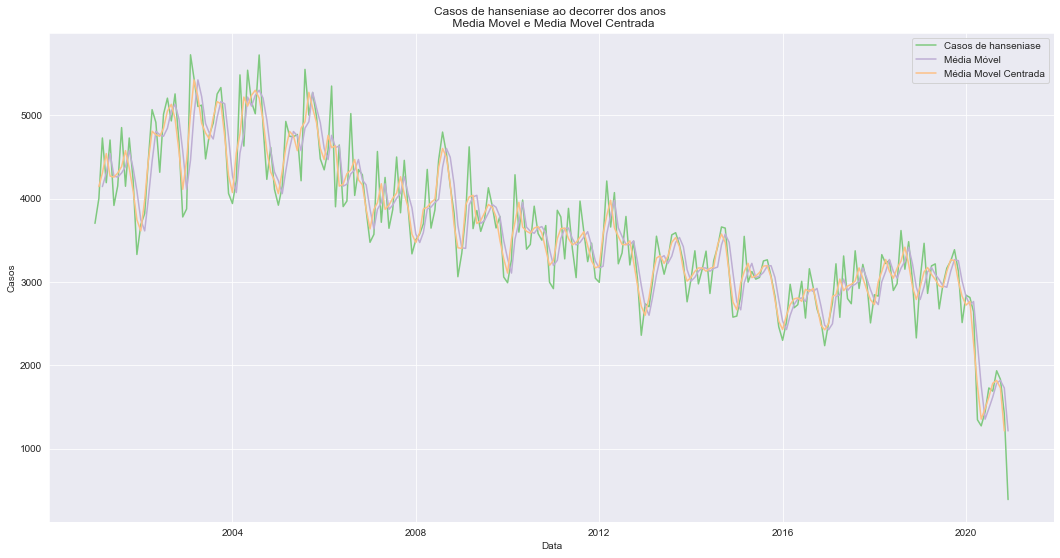

In [35]:
plt.figure(figsize=(18,9))
ax=sns.lineplot(data = df_st2, x = 'Data', y = 'Casos')
ax=sns.lineplot(data = df_st2, x = 'Data', y = 'Media Movel 3')
ax=sns.lineplot(data = df_st2, x = 'Data', y = 'Media Movel 3C')
ax.legend(['Casos de hanseniase','Média Móvel','Média Movel Centrada'])
ax.set_title('Casos de hanseniase ao decorrer dos anos \n Media Movel e Media Movel Centrada');

Muito felizmente podemos verificar que os casos de hanseniase veem diminuito muito nos ultimos anos e sua tendencia está caindo ainda mais com o passar do tempo

In [36]:
# Desafio VI: Prever 2021 Usando as medias de 2020
previsao_media_2 = df_st2[-12:][['Casos','Data']].rolling(2).mean(numeric_only = True)
previsao_media_2['Data'] = df_st2[-12:]['Data'].tolist()
previsao_media_2

,Casos,Data
19,NaN,2020-01-01
39,2827.5,2020-02-01
59,2728.0,2020-03-01
79,1994.5,2020-04-01
99,1310.5,2020-05-01
119,1358.0,2020-06-01
139,1585.5,2020-07-01
159,1709.5,2020-08-01
179,1812.5,2020-09-01
199,1883.5,2020-10-01


Text(0.5, 0, 'Data de notificacao')

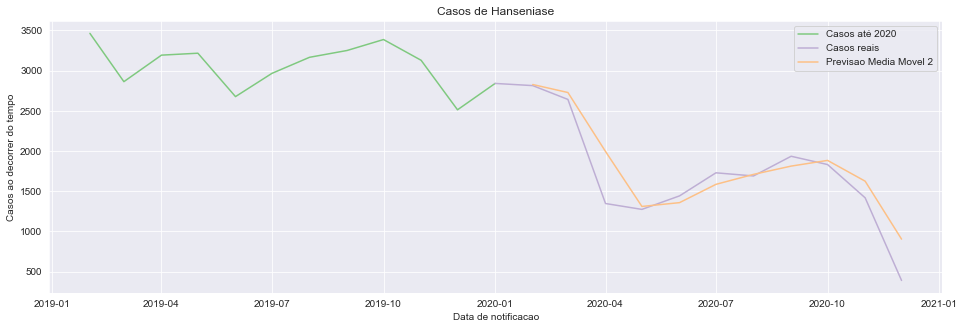

In [37]:
ax = plt.figure(figsize=(16,5))
ax = sns.lineplot(data = df_st2[217:-11], x = 'Data', y = 'Casos', label = 'Casos até 2020')
sns.lineplot(data = df_st2[-12:], x = 'Data', y = 'Casos', label = 'Casos reais')
sns.lineplot(data = previsao_media_2, x = 'Data', y = 'Casos', label = 'Previsao Media Movel 2')
ax.set_title('Casos de Hanseniase')
ax.set_ylabel('Casos ao decorrer do tempo')
ax.set_xlabel('Data de notificacao')

A nossa previsao foi bem fiel ao periodo real!

# Modulo IV: Decomposição e Autocorrelação

## Video I:
Comparação mes a mes em um unico gráfico para nao fazer diversos lineplots<br>
Utilizacao dt.year / month para adição de ano/mes no DF (novamente..)<br>
Utilizacao Seasonal  Decompose para comapração dos meses<br>
Desafio 07: Transformar as datas em index e realizar slices pelas datas

In [38]:
# Desafio 07
teste = df_st.copy()
teste.set_index('Data', inplace = True)

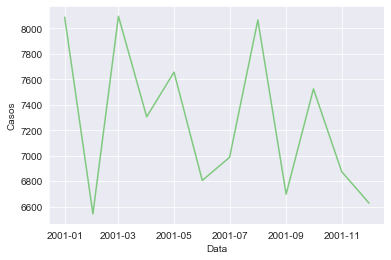

In [39]:
sns.lineplot(data = teste[:12], x = teste.index[:12], y = 'Casos')

In [40]:
df_st['Ano'] = df_st['Data'].dt.year
df_st['Mes'] = df_st['Data'].dt.month
df_st

,Data,Casos,Media Movel 3,Media Movel 6,Media Movel 3C,Ano,Mes
0,2001-01-01,8088,NaN,NaN,NaN,2001,1
1,2001-02-01,6542,NaN,NaN,7575.000000,2001,2
2,2001-03-01,8095,7575.000000,NaN,7314.000000,2001,3
3,2001-04-01,7305,7314.000000,NaN,7685.333333,2001,4
4,2001-05-01,7656,7685.333333,NaN,7255.333333,2001,5
...,...,...,...,...,...,...,...
223,2019-08-01,8239,7994.666667,8048.166667,8254.666667,2019,8
224,2019-09-01,8143,8254.666667,8130.666667,8324.666667,2019,9
225,2019-10-01,8592,8324.666667,8183.666667,8116.666667,2019,10
226,2019-11-01,7615,8116.666667,8055.666667,7809.000000,2019,11


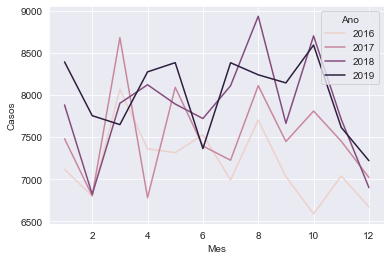

In [41]:
sns.lineplot(x='Mes', y = 'Casos', data = df_st.query('Ano in [2019,2018,2017,2016]'), hue = 'Ano')

Documentaçao Statsmodels TSA:
    https://www.statsmodels.org/stable/tsa.html

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose

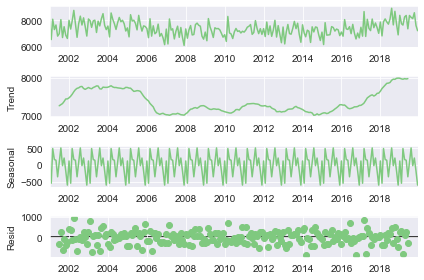

In [43]:
decomposicao = seasonal_decompose(df_st[['Data','Casos']].set_index('Data'))
decomposicao.plot();

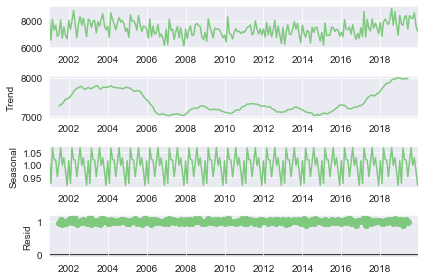

In [44]:
decomposicao = seasonal_decompose(df_st[['Data','Casos']].set_index('Data'), model = 'multiplicative')
decomposicao.plot();

## Video II
Leitura dos dados de passageiros ao longo dos anos,<bR>
Customizacao do gráfico de decomposicao sazonal;

In [45]:
url_passageiros = 'https://raw.githubusercontent.com/alura-cursos/serie_temporal_bootcamp/main/AirPassengers.csv'
dados_passageiros = pd.read_csv(url_passageiros)

In [46]:
dados_passageiros['Month'] = pd.to_datetime(dados_passageiros['Month'])

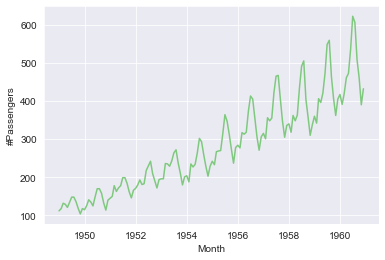

In [47]:
sns.lineplot(data = dados_passageiros, x = 'Month', y = '#Passengers')

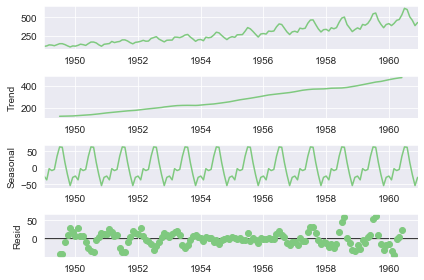

In [48]:
decomposicao_p = seasonal_decompose(dados_passageiros[['Month','#Passengers']].set_index('Month'))
decomposicao_p.plot();

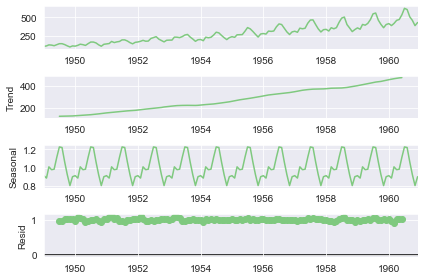

In [49]:
decomposicao_p = seasonal_decompose(dados_passageiros[['Month','#Passengers']].set_index('Month'), model = 'multiplicative')
decomposicao_p.plot();

### Desafio VIII:
Melhorar o gráfico de decomposição: Titulo, modificar tamanho

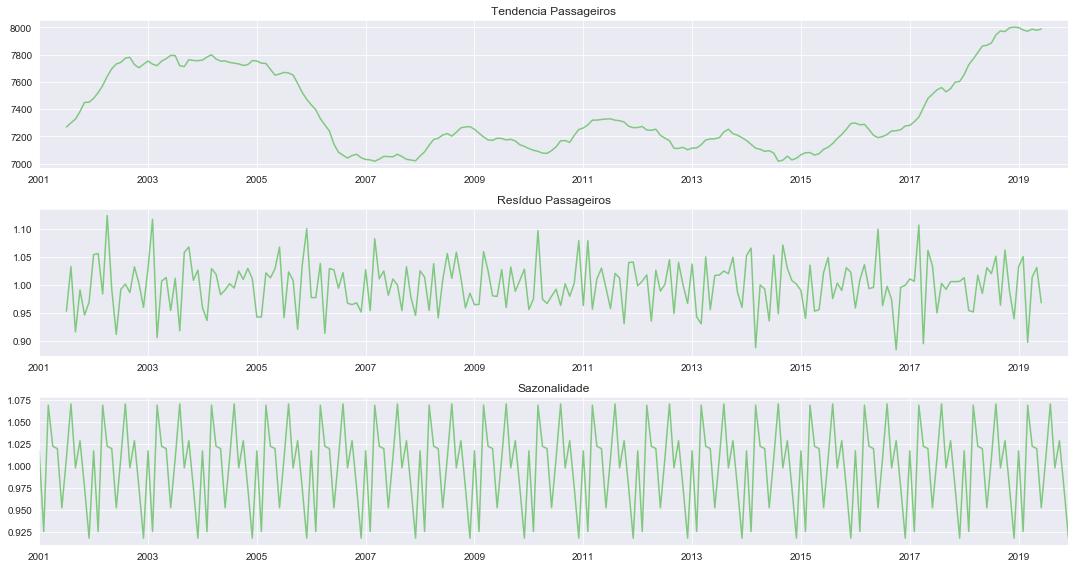

In [50]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,8))

decomposicao.trend.plot(ax=ax1).set_title('Tendencia Passageiros')
ax1.set_xlabel('')

decomposicao.resid.plot(ax=ax2).set_title('Resíduo Passageiros')
ax2.set_xlabel('')

decomposicao.seasonal.plot(ax=ax3).set_title('Sazonalidade')
ax3.set_xlabel('')

fig.tight_layout();

### Video III
Calcular a correlação dos dados (tuberculose) com apenas uma variável. (autocorrelação)

In [51]:
# O calculo é feito com um atraso nos dados
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# acf = auto correlacao
# pacf = partial auto correlation

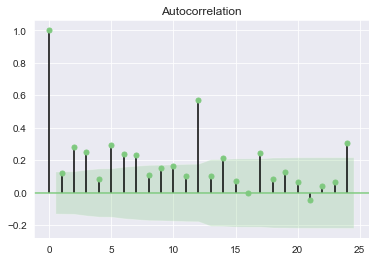

In [52]:
plot_acf(df_st['Casos']);
# Eixo x representa os lags
# Eixo y representa a correlação positiva ou negativa
# No 0 do eixo x representa a auto correlacao perfeita
# Uma auto correlacao boa seria no lag 12, chegando a proximo a 0.6
# A faixa representa o intervalo de confianca, linha acima representam uma boa taxa de auto correlacao

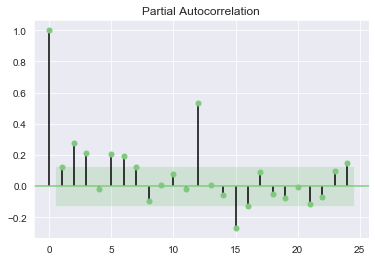

In [53]:
plot_pacf(df_st['Casos']);

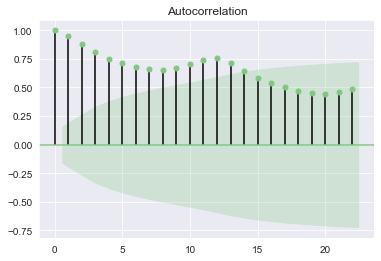

In [54]:
plot_acf(dados_passageiros['#Passengers']);

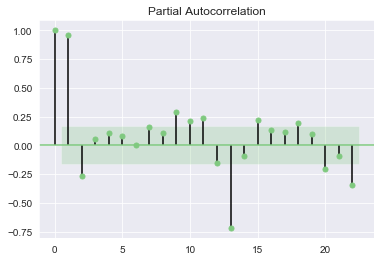

In [55]:
# O que estiver abaixo do intervalo de confiança, podemos desconsiderar uma autocorrelacao
# Acima do intervalo de confiança podemos ver as correlacoes que sao relevantes
plot_pacf(dados_passageiros['#Passengers']);

# Modulo V: Previsões em Séries Temporais

## Video I:
Reforçar conceitos de sazonalidade<br>
Verificacao de apenas o periodo de 1 ano em separado da sazonalidade para entender como se comporta (assemelhando a o gráfico de linha)

In [56]:
dados_passageiros.rename(columns = {'Month':'Data', '#Passengers':'Passageiros'}, inplace = True)

In [57]:
dados_passageiros['Mes'] = dados_passageiros['Data'].dt.month
dados_passageiros['Ano'] = dados_passageiros['Data'].dt.year
dados_passageiros

,Data,Passageiros,Mes,Ano
0,1949-01-01,112,1,1949
1,1949-02-01,118,2,1949
2,1949-03-01,132,3,1949
3,1949-04-01,129,4,1949
4,1949-05-01,121,5,1949
...,...,...,...,...
139,1960-08-01,606,8,1960
140,1960-09-01,508,9,1960
141,1960-10-01,461,10,1960
142,1960-11-01,390,11,1960


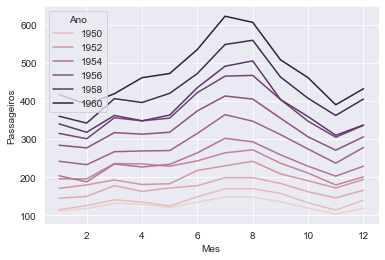

In [58]:
# Sazonalidade implica em um comportamento que ocorre em um período específico
sns.lineplot(data = dados_passageiros, x = 'Mes', y = 'Passageiros', hue  = 'Ano')

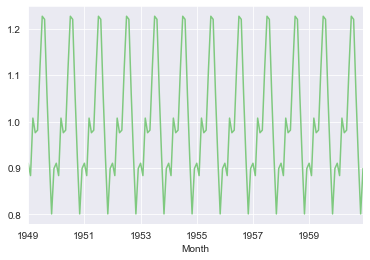

In [59]:
decomposicao_p.seasonal.plot()

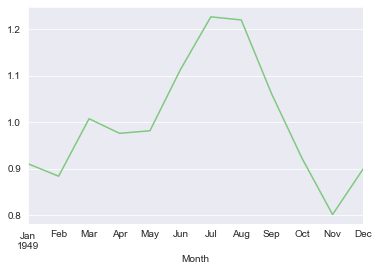

In [60]:
# Plot Sazonalidade dos meses
# Eixo Y representa a escala do nosso gráfico
# Caso nao haja nenhuma sazonalidade, a escala estaria muito mais proxima de 1

decomposicao_p.seasonal[:12].plot()

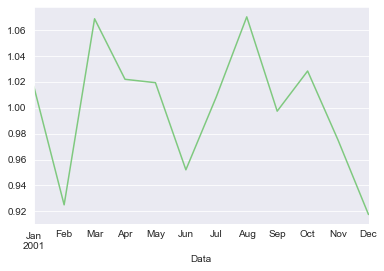

In [61]:
# Dados de tuberculose, possuimos uma sazonalidade, porem a escala esta bem menor
# o que torna um efeito menos agressivo da sazonalidade em nossos dados
decomposicao.seasonal[:12].plot()

In [62]:
# com base nas autocorrelacoes e autocorrelacoes parciais, sazonalidade etc e as informacoes vistas ate agora
# estas informacoes irao determinar qual modelo iremos utilizar para realizar a previsao

## Video II:
Previsões com ARIMA<br>
https://www.statsmodels.org/devel/generated/statsmodels.tsa.arima_model.ARIMA.html <br>
Utiliza médias móveis como base para sua previsão

In [63]:
from statsmodels.tsa.arima_model import ARIMA

In [64]:
# Necessita um conjunto de dados para ser instanciado
# E necessita tambem da ordem (order) tambem conhecida como PDQ
modelo_arima = ARIMA(df_st['Casos'].values.astype('float64'), order = [0,0,0])
modelo_arima_treinado = modelo_arima.fit()
# forecast usado para a previsão
# primeiro parametro: Quantos steps deseja prever
modelo_arima_treinado.forecast(12)

(array([7389.28508772, 7389.28508772, 7389.28508772, 7389.28508772,
        7389.28508772, 7389.28508772, 7389.28508772, 7389.28508772,
        7389.28508772, 7389.28508772, 7389.28508772, 7389.28508772]),
 array([567.21170306, 567.21170306, 567.21170306, 567.21170306,
        567.21170306, 567.21170306, 567.21170306, 567.21170306,
        567.21170306, 567.21170306, 567.21170306, 567.21170306]),
 array([[6277.5705781 , 8500.99959734],
        [6277.5705781 , 8500.99959734],
        [6277.5705781 , 8500.99959734],
        [6277.5705781 , 8500.99959734],
        [6277.5705781 , 8500.99959734],
        [6277.5705781 , 8500.99959734],
        [6277.5705781 , 8500.99959734],
        [6277.5705781 , 8500.99959734],
        [6277.5705781 , 8500.99959734],
        [6277.5705781 , 8500.99959734],
        [6277.5705781 , 8500.99959734],
        [6277.5705781 , 8500.99959734]]))

In [65]:
# A previsao esta sendo executada errada, pois nao separamos os dados em treino e teste

In [66]:
dados_treino = df_st.query('Ano != 2019')
dados_teste = df_st.query('Ano == 2019')
modelo_arima = ARIMA(dados_treino['Casos'].values.astype('float64'), order = [0,0,0])
modelo_arima_treinado = modelo_arima.fit()
previsao = modelo_arima_treinado.forecast(12)[0]

C:\Users\Kaiqu\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


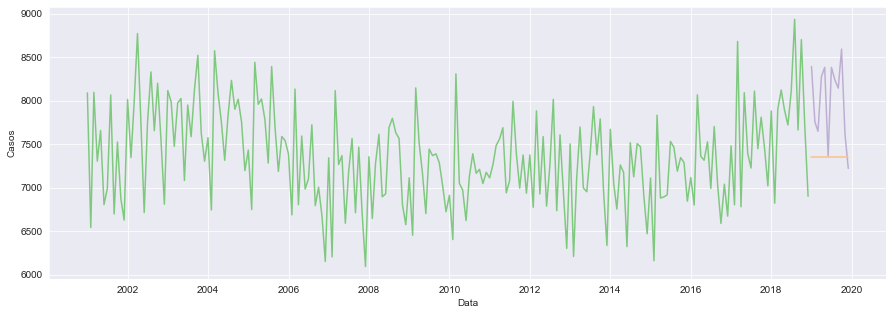

In [67]:
dados_teste['Previsao'] = previsao


plt.figure(figsize=(15,5))
sns.lineplot(x = 'Data', y = 'Casos', data = dados_treino)
sns.lineplot(x = 'Data', y = 'Casos', data = dados_teste)
sns.lineplot(x = 'Data', y = 'Previsao', data = dados_teste)

### Desafio 10:
Utilizar arima no df de passageiros e alterar o order

Explicação vista de como encontrar PDQ: https://stats.stackexchange.com/questions/44992/what-are-the-values-p-d-q-in-arima <br>

1. What does ARIMA(1, 0, 12) mean?

Specifically for your model, ARIMA(1, 0, 12) means that it you are describing some response variable (Y) by combining a 1st order Auto-Regressive model and a 12th order Moving Average model. A good way to think about it is (AR, I, MA). This makes your model look the following, in simple terms:

Y = (Auto-Regressive Parameters) + (Moving Average Parameters)

The 0 in the between the 1 and the 12 represents the 'I' part of the model (the Integrative part) and it signifies a model where you're taking the difference between response variable data - this can be done with non-stationary data and it doesn't seem like you're dealing with that, so you can just ignore it.

The link that DanTheMan posted shows a nice mix of models that could help you understand yours by comparing it to those.

2. What values can be assigned to p, d, q?

Lots of different whole numbers. There are diagnostic tests you can do to try to find the best values of p,d,q (see part 3).

3. What is the process to find the values of p, d, q?

There are a number of ways, and I don't intend this to be exhaustive:

look at an autocorrelation graph of the data (will help if Moving Average (MA) model is appropriate)<br>
look at a partial autocorrelation graph of the data (will help if AutoRegressive (AR) model is appropriate)<br>
look at extended autocorrelation chart of the data (will help if a combination of AR and MA are needed)<br>
try Akaike's Information Criterion (AIC) on a set of models and investigate the models with the lowest AIC values<br>
try the Schwartz Bayesian Information Criterion (BIC) and investigate the models with the lowest BIC values<br>

In [68]:
# 1 Separar dados, treino e teste
# 2 instanciar arima
# 3 realizar a previsao

df_treino_passageiros = dados_passageiros.query('Ano != 1960')
df_teste_passageiros = dados_passageiros.query('Ano == 1960')

In [69]:
modl_arima = ARIMA(df_treino_passageiros['Passageiros'].values.astype('float64'), order = [11,1,0])
modl_arima_trei = modl_arima.fit()
prev = modl_arima_trei.forecast(12)[0]

C:\Users\Kaiqu\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


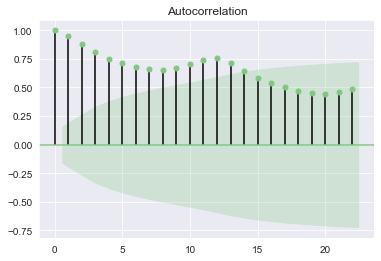

In [70]:
# a alteração na order deve ser realizada com base nos lags da autocorrelacao e correlacao
plot_acf(dados_passageiros['Passageiros']);

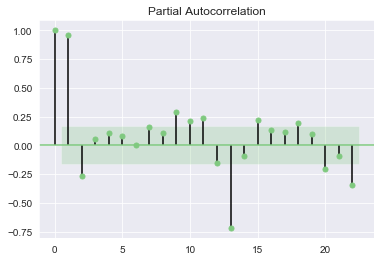

In [71]:
plot_pacf(dados_passageiros['Passageiros']);

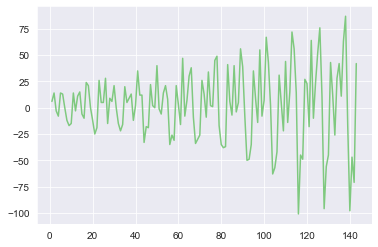

In [72]:
dados_passageiros['Passageiros'].diff().plot()

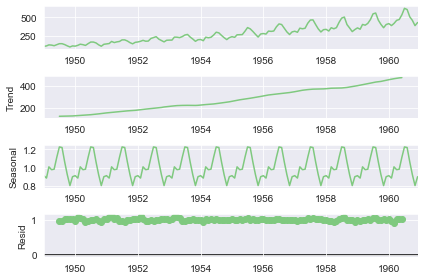

In [73]:
seas_decom = seasonal_decompose(dados_passageiros[['Data','Passageiros']].set_index('Data'), model = 'multiplicative')
seas_decom.plot();

C:\Users\Kaiqu\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


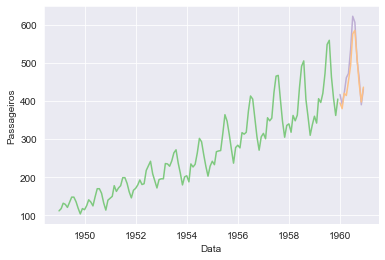

In [74]:
df_teste_passageiros['Previsao'] = prev

sns.lineplot(data = df_treino_passageiros, x = 'Data', y = 'Passageiros')
sns.lineplot(data = df_teste_passageiros, x = 'Data', y = 'Passageiros')
sns.lineplot(data = df_teste_passageiros, x = 'Data', y = 'Previsao')

## Video III:
Refinar o modelo arima para melhorar suas previsoes <br>
determinar ordem PDQ

In [75]:
modelo_arima = ARIMA(df_st['Casos'].values.astype('float64'), order = [0,0,0])
modelo_arima_treinado = modelo_arima.fit()
modelo_arima_treinado.forecast(12)

(array([7389.28508772, 7389.28508772, 7389.28508772, 7389.28508772,
        7389.28508772, 7389.28508772, 7389.28508772, 7389.28508772,
        7389.28508772, 7389.28508772, 7389.28508772, 7389.28508772]),
 array([567.21170306, 567.21170306, 567.21170306, 567.21170306,
        567.21170306, 567.21170306, 567.21170306, 567.21170306,
        567.21170306, 567.21170306, 567.21170306, 567.21170306]),
 array([[6277.5705781 , 8500.99959734],
        [6277.5705781 , 8500.99959734],
        [6277.5705781 , 8500.99959734],
        [6277.5705781 , 8500.99959734],
        [6277.5705781 , 8500.99959734],
        [6277.5705781 , 8500.99959734],
        [6277.5705781 , 8500.99959734],
        [6277.5705781 , 8500.99959734],
        [6277.5705781 , 8500.99959734],
        [6277.5705781 , 8500.99959734],
        [6277.5705781 , 8500.99959734],
        [6277.5705781 , 8500.99959734]]))

In [76]:
dados_treino = df_st.query('Ano != 2019')
dados_teste = df_st.query('Ano == 2019')
modelo_arima = ARIMA(dados_treino['Casos'].values.astype('float64'), order = [0,1,1])
modelo_arima_treinado = modelo_arima.fit()
previsao = modelo_arima_treinado.forecast(12)[0]

C:\Users\Kaiqu\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


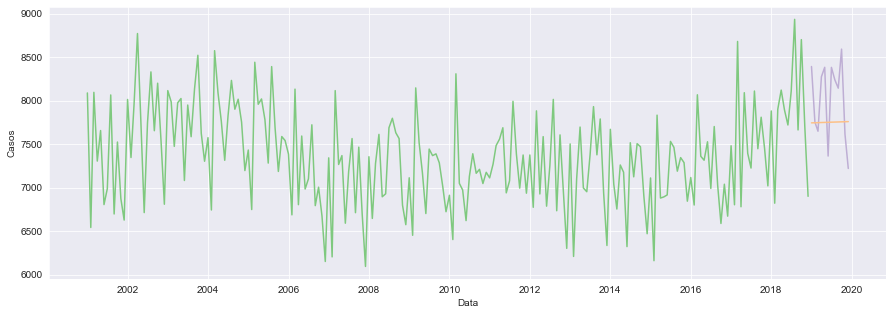

In [77]:
dados_teste['Previsao'] = previsao


plt.figure(figsize=(15,5))
sns.lineplot(x = 'Data', y = 'Casos', data = dados_treino)
sns.lineplot(x = 'Data', y = 'Casos', data = dados_teste)
sns.lineplot(x = 'Data', y = 'Previsao', data = dados_teste)

##### para determinar os valores QDP da order, iremos utilizar as analises de autocorrelacao, correlacao parcial e tendencia

Documentacao Autocorrelacao e parcial
https://www.mathworks.com/help/econ/autocorrelation-and-partial-autocorrelation.html

Leitura modelo ARIMA<br>
Como determinar qual utilizar?<br>

P(AR, autoregressividade) = Queda da autocorrelacao gradual<br>
Q(MA, média móveis) = Queda brusca da correlação após Q lags<br>
ARMA(p,q) = Queda gradual da correlacao.<br>

o que diferencia o modelo AR do modelo ARMA?<br>
Realizar a verificaçao da autocorrelacao parcial<br>

P(AR) = Queda abrupta após p lags<br>
Q(MA) = Queda gradual<br>
ARMA = Queda gradual dos lags<br>

Utilizar este modelo caso sua série temporal seja estacionária

In [78]:
# teste com dados passageiros
dados_treino_p = dados_passageiros.query('Ano != 1960')
dados_teste_p = dados_passageiros.query('Ano == 1960')

#Parametro D serve basicamente para a remocao da tendencia, realizacao dos devidos calculos e adicao da mesma novamente
modelo_arima = ARIMA(dados_treino_p['Passageiros'].values.astype('float64'), order = [2,1,2])
modelo_arima_treinado = modelo_arima.fit()
previsao = modelo_arima_treinado.forecast(12)[0]

C:\Users\Kaiqu\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


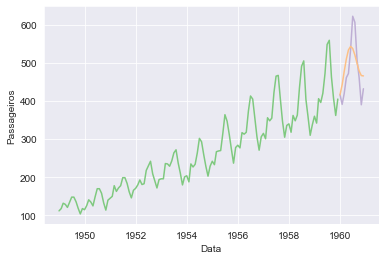

In [79]:
dados_teste_p['Previsao'] = previsao
sns.lineplot(x = 'Data', y = 'Passageiros', data = dados_treino_p)
sns.lineplot(x = 'Data', y = 'Passageiros', data = dados_teste_p)
sns.lineplot(x = 'Data', y = 'Previsao', data = dados_teste_p)

### Desafio XII:
visualizar a série temporal diferenciada dos passageiros(utilizar diff do pandas)

In [80]:
dados_passageiros['Diferenciado'] = dados_passageiros['Passageiros'].diff()

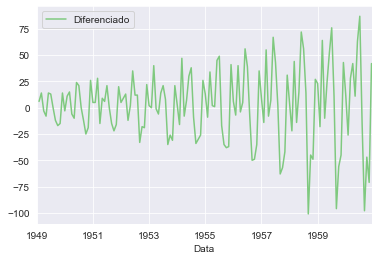

In [81]:
dados_passageiros.plot(kind = 'line', x = 'Data', y = 'Diferenciado')

### Continuando

A interpretação da série em sua autocorrelacao, deve ser feita com a mesma diferenciada (diff())

In [82]:
dados_treino = df_st.query('Ano != 2019')
dados_teste = df_st.query('Ano == 2019')
modelo_arima = ARIMA(dados_treino['Casos'].values.astype('float64'), order = [12,1,2])
modelo_arima_treinado = modelo_arima.fit()
previsao = modelo_arima_treinado.forecast(12)[0]

C:\Users\Kaiqu\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


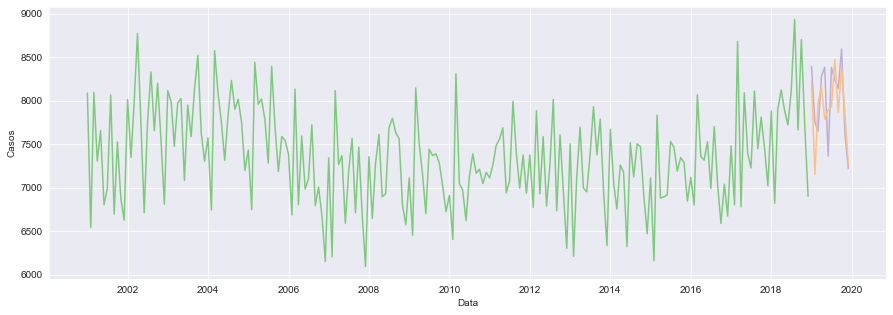

In [83]:
dados_teste['Previsao'] = previsao


plt.figure(figsize=(15,5))
sns.lineplot(x = 'Data', y = 'Casos', data = dados_treino)
sns.lineplot(x = 'Data', y = 'Casos', data = dados_teste)
sns.lineplot(x = 'Data', y = 'Previsao', data = dados_teste)

# Modulo VI: AUTOARIMA e prophet

## Video I:
Métricas de avaliação e autoarima

In [84]:
# Instalação biblioteca pmdarima
#!pip install pmdarima

In [85]:
from pmdarima.arima import auto_arima

In [86]:
# error_action usado para ignorar os erros caso ocorram
# AIC é uma metrica de comparacao, quanto menor, melhor.
# M é referente a sazonalidade / periodicidade, "em caso de dados mensais, valor deve ser setado a 12"
modelo_auto_arima = auto_arima(dados_treino['Casos'].values.astype('float32'), error_action = 'ignore', trace = 'True', seasonal = True, m = 12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=4.22 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3462.510, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3289.199, Time=0.67 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3249.086, Time=1.20 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3460.524, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=3312.298, Time=0.20 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=2.89 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=3246.454, Time=4.15 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=9.29 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=3398.593, Time=2.55 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=3242.479, Time=5.13 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=3246.995, Time=1.90 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=3215.833, Time=7.98 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.49 sec
 ARIMA(1,1,1)(2,0,2)[12] intercept   : 

In [87]:
previsao = modelo_auto_arima.predict(12)

C:\Users\Kaiqu\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


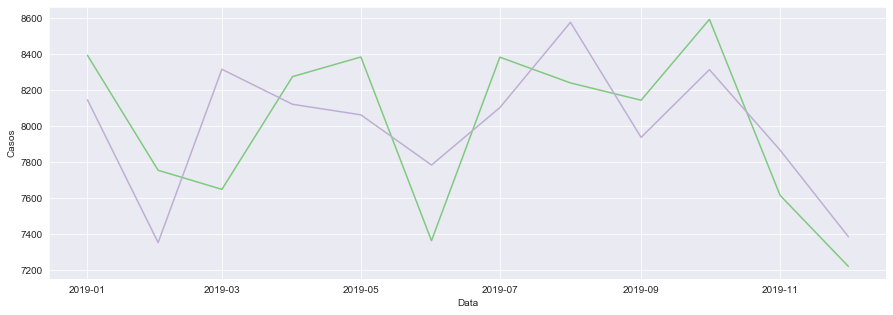

In [88]:
dados_teste['Previsao_AA'] = previsao


plt.figure(figsize=(15,5))
#sns.lineplot(x = 'Data', y = 'Casos', data = dados_treino)
sns.lineplot(x = 'Data', y = 'Casos', data = dados_teste)
sns.lineplot(x = 'Data', y = 'Previsao_AA', data = dados_teste)

### Desafio Extra:
Realizar os mesmos passos para os dados de passageiros

In [89]:
modelo_autoarima_p = auto_arima(dados_treino_p['Passageiros'].values.astype('float32'), m = 12, trace = True, seasonal = True, error_action = 'ignore')

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=4.59 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1022.234, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=906.857, Time=0.79 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=963.555, Time=0.77 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1192.711, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=907.180, Time=0.23 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=908.543, Time=3.34 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=2.55 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=907.120, Time=0.79 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=9.00 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1021.611, Time=0.63 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=906.396, Time=1.13 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=906.075, Time=0.29 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=906.713, Time=0.86 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC

In [90]:
previsao_p = modelo_autoarima_p.predict(12)
dados_teste_p['Previsao'] = previsao_p

C:\Users\Kaiqu\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


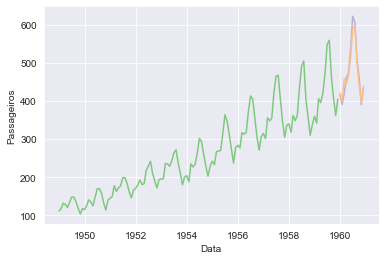

In [91]:
sns.lineplot(data=dados_treino_p, x = 'Data', y = 'Passageiros')
sns.lineplot(data=dados_teste_p, x = 'Data', y = 'Passageiros')
sns.lineplot(data=dados_teste_p, x = 'Data', y = 'Previsao')

### Continuando:

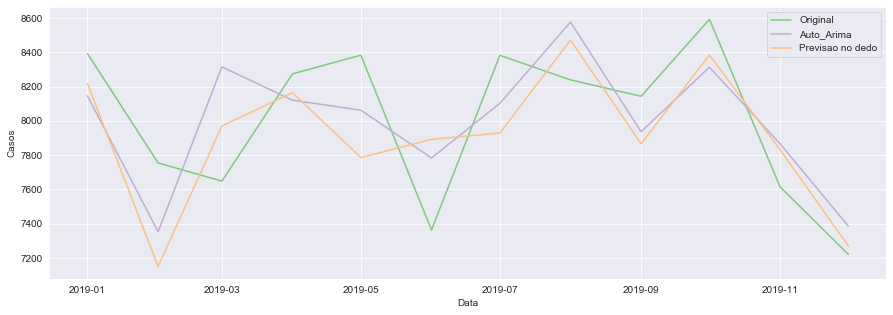

In [92]:
plt.figure(figsize=(15,5))
#sns.lineplot(x = 'Data', y = 'Casos', data = dados_treino)
sns.lineplot(x = 'Data', y = 'Casos', data = dados_teste, label = 'Original')
sns.lineplot(x = 'Data', y = 'Previsao_AA', data = dados_teste, label = 'Auto_Arima')
sns.lineplot(x = 'Data', y = 'Previsao', data = dados_teste, label = 'Previsao no dedo')

In [93]:
# para verificarmos qual previsão está mais aproximada do "correto", iremos usar o erro quadratico médio

from sklearn.metrics import mean_squared_error

In [94]:
# No nosso caso atual, o algoritmo 'vencedor' foi o autoarima (Quanto menor o valor, melhor)
result_aa = mean_squared_error(dados_teste['Casos'], dados_teste['Previsao_AA'])
result_arima = mean_squared_error(dados_teste['Casos'], dados_teste['Previsao'])
print('autoarima: {}, arima: {}'.format(result_aa, result_arima))

autoarima: 114394.69050091396, arima: 131384.2448221447


## Video II:
utilização de prophet

In [99]:
#!pip install pystan
#!conda install -c conda-forge fbprophet
#!pip install fbprophet

  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)


In [100]:
from fbprophet import Prophet

In [120]:
modelo_profeta = Prophet(seasonality_mode='multiplicative')

In [121]:
# o treinamento do prophet necessita que as variaveis utilizadas para leitura sejam 'ds' e 'y'
dados_treino_profeta = dados_treino.rename(columns = {'Data':'ds', 'Casos':'y'})
dados_treino_profeta

,ds,y,Media Movel 3,Media Movel 6,Media Movel 3C,Ano,Mes
0,2001-01-01,8088,NaN,NaN,NaN,2001,1
1,2001-02-01,6542,NaN,NaN,7575.000000,2001,2
2,2001-03-01,8095,7575.000000,NaN,7314.000000,2001,3
3,2001-04-01,7305,7314.000000,NaN,7685.333333,2001,4
4,2001-05-01,7656,7685.333333,NaN,7255.333333,2001,5
...,...,...,...,...,...,...,...
211,2018-08-01,8934,8254.333333,8112.833333,8235.333333,2018,8
212,2018-09-01,7663,8235.333333,8073.166667,8432.666667,2018,9
213,2018-10-01,8701,8432.666667,8169.833333,8025.000000,2018,10
214,2018-11-01,7711,8025.000000,8139.666667,7770.666667,2018,11


In [122]:
modelo_profeta_treinado = modelo_profeta.fit(dados_treino_profeta[['ds', 'y']])

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Kaiqu\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [123]:
# A previsao com este modelo é diferenciada, devemos selecionar a criaçao do df futuro, informar o tanto de saltos, a frequencia
futuro = modelo_profeta_treinado.make_future_dataframe(periods = 12, freq='M')
futuro

,ds
0,2001-01-01
1,2001-02-01
2,2001-03-01
3,2001-04-01
4,2001-05-01
...,...
223,2019-07-31
224,2019-08-31
225,2019-09-30
226,2019-10-31


In [124]:
# previsao abaixo
resultado_profeta = modelo_profeta_treinado.predict(futuro)
resultado_profeta

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2001-01-01,7676.313174,7383.050337,8274.284451,7676.313174,7676.313174,0.021384,0.021384,0.021384,0.021384,0.021384,0.021384,0.0,0.0,0.0,7840.464256
1,2001-02-01,7673.661347,6461.980910,7368.550910,7673.661347,7673.661347,-0.099948,-0.099948,-0.099948,-0.099948,-0.099948,-0.099948,0.0,0.0,0.0,6906.695369
2,2001-03-01,7671.266149,7788.449101,8730.213605,7671.266149,7671.266149,0.075546,0.075546,0.075546,0.075546,0.075546,0.075546,0.0,0.0,0.0,8250.798579
3,2001-04-01,7668.614322,7327.411270,8244.842858,7668.614322,7668.614322,0.014098,0.014098,0.014098,0.014098,0.014098,0.014098,0.0,0.0,0.0,7776.724431
4,2001-05-01,7666.048038,7315.766725,8198.010960,7666.048038,7666.048038,0.012167,0.012167,0.012167,0.012167,0.012167,0.012167,0.0,0.0,0.0,7759.320272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,2019-07-31,7839.606135,7530.600412,8413.591529,7834.295644,7844.575234,0.018446,0.018446,0.018446,0.018446,0.018446,0.018446,0.0,0.0,0.0,7984.215578
224,2019-08-31,7851.780148,7379.899785,8334.098464,7845.238841,7858.192432,0.000457,0.000457,0.000457,0.000457,0.000457,0.000457,0.0,0.0,0.0,7855.366679
225,2019-09-30,7863.561450,7854.721069,8756.371583,7855.917685,7871.629816,0.055346,0.055346,0.055346,0.055346,0.055346,0.055346,0.0,0.0,0.0,8298.780320
226,2019-10-31,7875.735463,7205.931172,8117.106703,7866.837964,7885.496006,-0.027901,-0.027901,-0.027901,-0.027901,-0.027901,-0.027901,0.0,0.0,0.0,7655.992001


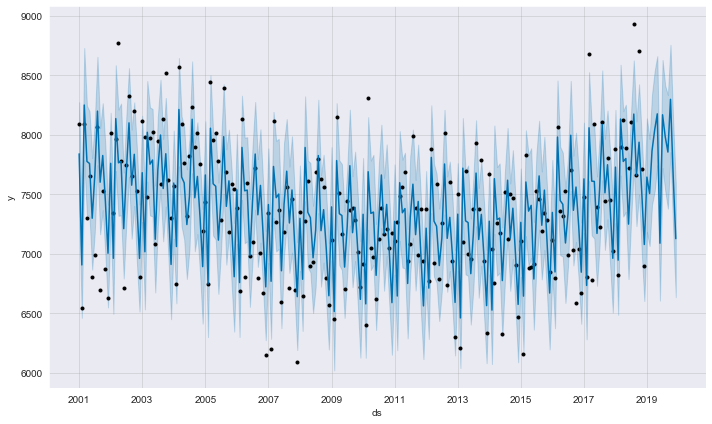

In [125]:
# o plot fica mais facil com estes dados do df gerado
# Os pontos pretos significam os dados reais,
# a linha azul representa a previsao
# a mancha azul representa o intervalo de confianca
modelo_profeta_treinado.plot(resultado_profeta);

In [126]:
mean_squared_error(df_st['Casos'], resultado_profeta['yhat'])

126950.10136639327

### teste em dados de passageiros

In [132]:
profeta_passageiros = Prophet(seasonality_mode='multiplicative')
dados_treino_profeta_p = dados_treino_p.rename(columns = {'Data':'ds', 'Passageiros':'y'})
dados_treino_profeta_p

,ds,y,Mes,Ano
0,1949-01-01,112,1,1949
1,1949-02-01,118,2,1949
2,1949-03-01,132,3,1949
3,1949-04-01,129,4,1949
4,1949-05-01,121,5,1949
...,...,...,...,...
127,1959-08-01,559,8,1959
128,1959-09-01,463,9,1959
129,1959-10-01,407,10,1959
130,1959-11-01,362,11,1959


In [133]:
modelo_profeta_treinado_p = profeta_passageiros.fit(dados_treino_profeta_p[['ds','y']])

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Kaiqu\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [134]:
futuro_passageiros = modelo_profeta_treinado_p.make_future_dataframe(periods = 12, freq='M')
resultado_profeta_passageiros = modelo_profeta_treinado_p.predict(futuro_passageiros)

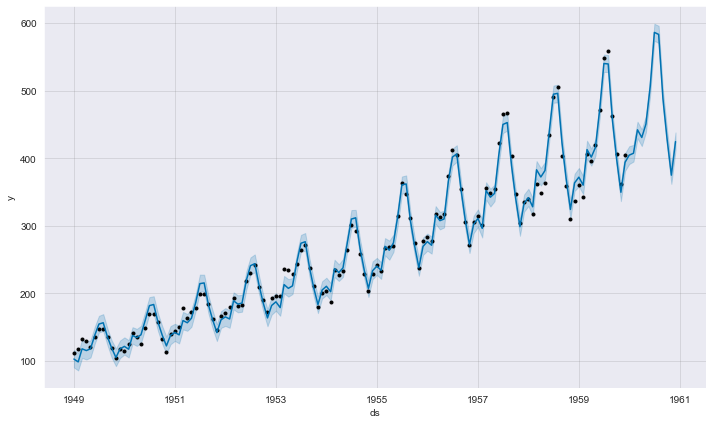

In [136]:
modelo_profeta_treinado_p.plot(resultado_profeta_passageiros);